<a href="https://colab.research.google.com/github/mrvzay/nlp/blob/main/Disaster_tweets_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Disaster-tweets

In [108]:
# Check the GPU
!nvidia-smi

Wed Jun 29 01:14:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    29W /  70W |   9088MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-60fc7657-a414-b2c0-982d-51c8761daa15)


### Get the data

The dataset downloaded from kaggle

Dataset Disaster-tweets dataset publically available form [kaggle](https://www.kaggle.com/competitions/nlp-getting-started/data)


**Download the dataset**


In [3]:
!wget https://raw.githubusercontent.com/mrvzay/nlp/main/Datasets/sample_submission.csv
!wget https://raw.githubusercontent.com/mrvzay/nlp/main/Datasets/train.csv
!wget https://raw.githubusercontent.com/mrvzay/nlp/main/Datasets/test.csv

--2022-06-29 01:08:36--  https://raw.githubusercontent.com/mrvzay/nlp/main/Datasets/sample_submission.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22746 (22K) [text/plain]
Saving to: ‘sample_submission.csv’

sample_submission.c 100%[===================>]  22.21K  --.-KB/s    in 0s      

2022-06-29 01:08:37 (95.8 MB/s) - ‘sample_submission.csv’ saved [22746/22746]

--2022-06-29 01:08:37--  https://raw.githubusercontent.com/mrvzay/nlp/main/Datasets/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987712 (965K) [text

Or

In [4]:
# # Import pandas
# import pandas as pd
# train_df = pd.read_csv(" https://raw.githubusercontent.com/mrvzay/nlp/main/Datasets/train.csv")
# test_df = pd.read_csv(" https://raw.githubusercontent.com/mrvzay/nlp/main/Datasets/test.csv")
# train_df.head()

In [5]:
# Turun .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Ok looks good!, Let's shuffled this data.

In [6]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
# View the test data doesn't have shuffled
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

Since we have two target values, we're dealing with a **binary classification** problem.

* `1` = a real disaster tweet
* `2` = not a real disaster tweet

In [9]:
# Total sample ?
print(f"Total training samples : {len(train_df)}")
print(f"Total test samples : {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples : 7613
Total test samples : 3263
Total samples: 10876


In [10]:
# Visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
   _, text, target = row
   print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
   print(f"Text:\n{text}\n")
   print("---\n")

Target: 0 (not real disaster)
Text:
@CorleoneDaBoss there isn't anything there its desolate bc of its nature. The significance is that we were the first country to do it

---

Target: 0 (not real disaster)
Text:
Camping in a war zone with roving raccoons toughens city slicker http://t.co/oJuS08yZrq

---

Target: 0 (not real disaster)
Text:
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time

---

Target: 0 (not real disaster)
Text:
@estellasrevenge the first time i went swiming in it i was basically screaming WHY DOES IT SMELL/TASTE SO BAD

---

Target: 1 (real disaster)
Text:
1.94 earthquake occurred 5km S of Volcano Hawaii at 01:04 UTC! #earthquake #Volcano http://t.co/auf4J4Owj1

---



### Split data into training and validation sets

In [11]:
from sklearn.model_selection import train_test_split

# Use train_test_split to train and valid sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, 
                                                                            random_state=42) 

In [12]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [13]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

### Converting text into numbers --> text vectorization(tokenization)

All default

In [14]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, 
                                    standardize="lower_and_strip_punctuation", 
                                    split="whitespace", # how to split tokens
                                    ngrams=None, 
                                    output_mode="int", 
                                    output_sequence_length=None)

In [15]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [16]:
# Setup text vectorization
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

All right!

`adapt()` train_sentences.

In [17]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [18]:
#  Create sample sentence and tokenize it
sample_sentence = "There's in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [19]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
FYI CAD:FYI: ;ACCIDENT PROPERTY DAMAGE;NHS;999 PINER RD/HORNDALE DR      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[3823, 6041,  128,  927,    1, 4915, 4789, 1417,    0,    0,    0,
           0,    0,    0,    0]])>

Looks good!

In [20]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] 
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creatign an Embedding Layer


In [21]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1") 
embedding

In [22]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
#pakistan#news# NANKANA SAHIB City News: Electrocuted From Our Correspondent NANKANA SAHIB: A youth was electr... http://t.co/WERK9qibVV      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04659212, -0.01508927, -0.04933112, ...,  0.04651214,
          0.02619504, -0.00411104],
        [-0.00163632, -0.02222832,  0.04850096, ..., -0.04141859,
         -0.01349536, -0.01418699],
        [ 0.04216373, -0.03149183,  0.01370579, ..., -0.03580581,
          0.0071522 ,  0.04927491],
        ...,
        [-0.04575056,  0.00739881,  0.03085515, ..., -0.032814  ,
          0.03432902,  0.04912683],
        [-0.03130728, -0.01293154, -0.00859123, ..., -0.0175923 ,
         -0.01790538,  0.0255311 ],
        [ 0.03977952, -0.03782602, -0.03646283, ...,  0.00236253,
          0.03332629,  0.02803668]]], dtype=float32)>

In [23]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.04659212, -0.01508927, -0.04933112, -0.04507761,  0.0460076 ,
       -0.00725333,  0.022174  , -0.00597562,  0.04692062,  0.00310778,
        0.03258065,  0.02528061, -0.01707866,  0.03260479,  0.01518618,
       -0.01247175, -0.00654006,  0.02323819,  0.03946452,  0.03119773,
        0.03544003, -0.0338807 , -0.04204173, -0.00851325,  0.03262926,
        0.04581514, -0.03679292,  0.03287854,  0.02261183, -0.03727473,
       -0.02245544,  0.0146811 ,  0.0016122 ,  0.04261316, -0.00482373,
       -0.03645284, -0.03547155, -0.04360155,  0.03284024, -0.02794408,
       -0.02116069, -0.03675287,  0.0277018 ,  0.03582767,  0.04964534,
        0.02440859,  0.02365822, -0.03533109,  0.00607886,  0.00801612,
       -0.04728491,  0.04143044,  0.00393121,  0.01865568,  0.01039254,
       -0.00459285, -0.03932508, -0.01522791, -0.01947661,  0.03191929,
        0.00349855, -0.03539827, -0.01916894,  0.04052566,  0.00723455,
       -0.021602

### Model 0: Getting a abaseline

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB()) 
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [26]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Evaluation function for our model experiments

In [27]:
# Fucntion to evaluate: accuracy, precision, recall, f1-scores
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results


In [28]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model2 : LSTM

In [29]:
# Set random seed 
tf.random.set_seed(42)
from tensorflow.keras import layers

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [30]:
# Get the summary
model_1.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [31]:
# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [32]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [33]:
# Fit model
model_2_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20220629-010849
Epoch 1/5
215/215 [==============================] - 18s 16ms/step - loss: 0.5111 - accuracy: 0.7421 - val_loss: 0.4568 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3170 - accuracy: 0.8720 - val_loss: 0.5104 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2196 - accuracy: 0.9162 - val_loss: 0.5815 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1585 - accuracy: 0.9426 - val_loss: 0.6036 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1123 - accuracy: 0.9590 - val_loss: 0.7739 - val_accuracy: 0.7612


In [34]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.7739 - accuracy: 0.7612


[0.7738629579544067, 0.76115483045578]

In [35]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.00653416, -0.00849133, -0.00864258, ..., -0.01829796,
          0.00995713,  0.00198636],
        [ 0.02048921, -0.03245824, -0.04065765, ..., -0.00368664,
          0.02724606,  0.03482351],
        [ 0.03746014,  0.01862933,  0.02065441, ..., -0.04077971,
         -0.0228936 , -0.00232712],
        ...,
        [-0.03301444, -0.0052493 , -0.04209725, ...,  0.02028764,
          0.00308807,  0.02215792],
        [ 0.07152236, -0.00397675,  0.03343961, ..., -0.00147377,
          0.04618806,  0.01660274],
        [ 0.08264666, -0.05271624,  0.0336953 , ...,  0.0876596 ,
          0.02437263,  0.00916117]], dtype=float32)>]

In [36]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [37]:
# Make predictions on the validation dataset
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape, model_1_pred_probs[:10] 

((762, 1), array([[0.01252021],
        [0.72711366],
        [0.9992951 ],
        [0.092788  ],
        [0.00432706],
        [0.99895895],
        [0.75157833],
        [0.9996811 ],
        [0.99953794],
        [0.281614  ]], dtype=float32))

In [38]:
# Round out predictions and reduce to 1-dimensional array
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [39]:
# Calculate LSTM model results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 76.11548556430446,
 'f1': 0.7591215732608759,
 'precision': 0.7622953452640989,
 'recall': 0.7611548556430446}

In [40]:
# LSTM model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [41]:
# Create a function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 76.12, Difference: -3.15
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


### Model 3: GRU

In [42]:
# Set random seed 
tf.random.set_seed(42)

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x) 
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_GRU")

# Compile GRU model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [43]:
# Get the summary
model_2.summary()

Model: "model_2_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [44]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20220629-010917
Epoch 1/5
215/215 [==============================] - 4s 9ms/step - loss: 0.2029 - accuracy: 0.9196 - val_loss: 0.6000 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1076 - accuracy: 0.9635 - val_loss: 0.7522 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0821 - accuracy: 0.9701 - val_loss: 0.9772 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0712 - accuracy: 0.9737 - val_loss: 0.9739 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0549 - accuracy: 0.9766 - val_loss: 1.1474 - val_accuracy: 0.7625


In [45]:
# Make predictions on the validation data
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

((762, 1), array([[1.6046735e-03],
        [8.3540273e-01],
        [9.9976438e-01],
        [1.4714608e-01],
        [1.3549480e-04],
        [9.9982858e-01],
        [6.1915731e-01],
        [9.9994934e-01],
        [9.9987626e-01],
        [5.8785200e-01]], dtype=float32))

In [46]:
# Convert prediction probabilities to prediction classes
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [47]:
# Calcuate model_3 results
model_2_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 76.24671916010499,
 'f1': 0.7611077640788777,
 'precision': 0.7626600366229389,
 'recall': 0.7624671916010499}

In [48]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 76.25, Difference: -3.02
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


### Model 3 : Bidrectonal RNN 

In [49]:
# Set random seed 
tf.random.set_seed(42)

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_Bidirectional")

# Compile
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [50]:
# Get the summary of our bidrectional model
model_3.summary()

Model: "model_3_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [51]:
# Fit the model (takes longer because of the bidirectional layers)
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])


Saving TensorBoard log files to: model_logs/bidirectional_RNN/20220629-010931
Epoch 1/5
215/215 [==============================] - 6s 13ms/step - loss: 0.1359 - accuracy: 0.9584 - val_loss: 0.8802 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0606 - accuracy: 0.9742 - val_loss: 1.1542 - val_accuracy: 0.7441
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0504 - accuracy: 0.9772 - val_loss: 1.4731 - val_accuracy: 0.7467
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0462 - accuracy: 0.9788 - val_loss: 1.4139 - val_accuracy: 0.7480
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0413 - accuracy: 0.9803 - val_loss: 1.3861 - val_accuracy: 0.7507


In [52]:
# Make predictions with bidirectional RNN on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[8.8529545e-05],
       [7.5371534e-01],
       [9.9997365e-01],
       [2.5231093e-01],
       [9.5492069e-06],
       [9.9994576e-01],
       [9.4336045e-01],
       [9.9999595e-01],
       [9.9999213e-01],
       [4.8894840e-01]], dtype=float32)

In [53]:
# Convert prediction probabilities to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [54]:
# Calculate bidirectional RNN model results
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': 75.06561679790026,
 'f1': 0.7492868378844072,
 'precision': 0.7506090886621235,
 'recall': 0.7506561679790026}

In [55]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 75.07, Difference: -4.20
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.04


### Model 4 : Conv1D

In [56]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") 
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [57]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.04204549, -0.06521689, -0.00809095, ..., -0.01300226,
          -0.00577988,  0.07474241],
         [ 0.00964332,  0.0571816 ,  0.01151996, ...,  0.04109724,
          -0.01702232,  0.03329363],
         [-0.00322814, -0.01537106, -0.01722317, ..., -0.00870138,
           0.0297887 ,  0.04420387],
         ...,
         [-0.00077723, -0.02222233,  0.00725861, ...,  0.00217946,
           0.01849662,  0.00910139],
         [-0.00077723, -0.02222233,  0.00725861, ...,  0.00217946,
           0.01849662,  0.00910139],
         [-0.00077723, -0.02222233,  0.00725861, ...,  0.00217946,
           0.01849662,  0.00910139]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.        , 0.01932037, 0.07477424,
          0.01196874, 0.07059799, 0.04444509, 0.02006973, 0.04441005,
          0.        , 0.        , 0.        , 0.0298219 , 0.        ,
          0.03859246, 0.

In [58]:
# Set random seed
tf.random.set_seed(42)

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Conv1D")

# Compile Conv1D model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 1)              

In [59]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20220629-011002
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1805 - accuracy: 0.9477 - val_loss: 0.7381 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0860 - accuracy: 0.9698 - val_loss: 0.8822 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0659 - accuracy: 0.9765 - val_loss: 0.9531 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0569 - accuracy: 0.9788 - val_loss: 1.0358 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0514 - accuracy: 0.9806 - val_loss: 1.0731 - val_accuracy: 0.7533


In [60]:
# Make predictions with model_5
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[9.5170941e-03],
       [6.9959760e-01],
       [9.9993432e-01],
       [1.5904124e-01],
       [2.3525424e-06],
       [9.8428726e-01],
       [8.6054355e-01],
       [9.9995005e-01],
       [9.9999726e-01],
       [4.3954611e-01]], dtype=float32)

In [61]:
# Convert model_5 prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [62]:
# Calculate model_5 evaluation metrics 
model_4_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 75.32808398950131,
 'f1': 0.7509025222684302,
 'precision': 0.7546715751440161,
 'recall': 0.7532808398950132}

In [63]:

# Compare model_4 results to baseline 
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 75.33, Difference: -3.94
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.04


### Model 5: TensorFlow Hub Pretrained Sentence Encoder

In [106]:
import tensorflow_hub as hub

In [66]:
# encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], 
                                        dtype=tf.string, 
                                        trainable=False, 
                                        name="USE") 

In [67]:
# Create model using the Sequential API
model_5 = tf.keras.Sequential([
  sentence_encoder_layer, 
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_5_USE")

# Compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_5.summary()

Model: "model_5_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [68]:
# Train a classifier on top of pretrained embeddings
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20220629-011034
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5069 - accuracy: 0.7824 - val_loss: 0.4462 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4147 - accuracy: 0.8133 - val_loss: 0.4355 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3999 - accuracy: 0.8222 - val_loss: 0.4310 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3926 - accuracy: 0.8260 - val_loss: 0.4267 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3864 - accuracy: 0.8295 - val_loss: 0.4284 - val_accuracy: 0.8176


In [69]:
# Make predictions with USE TF Hub model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[0.15596274],
       [0.74068695],
       [0.9869403 ],
       [0.20447308],
       [0.7232979 ],
       [0.6851671 ],
       [0.98144066],
       [0.97757316],
       [0.92527306],
       [0.08762988]], dtype=float32)

In [70]:
# Convert prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [71]:
# Calculate model 6 performance metrics
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 81.75853018372703,
 'f1': 0.8160820787192251,
 'precision': 0.8199411418946955,
 'recall': 0.8175853018372703}

In [72]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 81.76, Difference: 2.49
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.02
Baseline f1: 0.79, New f1: 0.82, Difference: 0.03


### Comparing the performance of each of our models

In [73]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "lstm": model_1_results,
                                  "gru": model_2_results,
                                  "bidirectional": model_3_results,
                                  "conv1d": model_4_results,
                                  "tf_hub_sentence_encoder": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
lstm,76.115486,0.762295,0.761155,0.759122
gru,76.246719,0.762660,0.762467,0.761108
bidirectional,75.065617,0.750609,0.750656,0.749287
conv1d,75.328084,0.754672,0.753281,0.750903
tf_hub_sentence_encoder,81.758530,0.819941,0.817585,0.816082


In [74]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

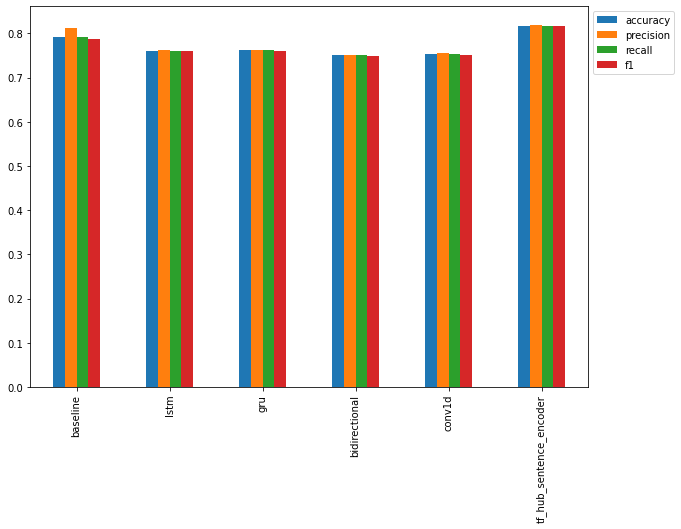

In [75]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

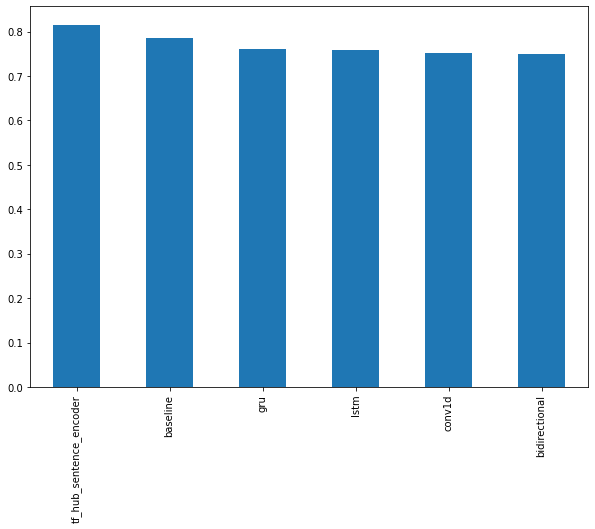

In [76]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [77]:
# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "Modeling experiments" \
#   --description "Different NLP models experiments with various models" \
#   --one_shot 

In [78]:
# Experiments TensorBoard dev id 
# !tensorboard dev list

In [79]:
# Delete TensorBoard dev experimental
# !tensorboard dev delete --experiment_id <<<id>>>

In [80]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) 
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_1_pred_probs, axis=1) + tf.squeeze(model_5_pred_probs)
combined_preds = tf.round(combined_pred_probs/3)

In [81]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 77.82152230971128,
 'f1': 0.7777458336465682,
 'precision': 0.7778849274912267,
 'recall': 0.7782152230971129}

In [82]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [83]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100


In [84]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
lstm,0.761155,0.762295,0.761155,0.759122
gru,0.762467,0.762660,0.762467,0.761108
bidirectional,0.750656,0.750609,0.750656,0.749287
conv1d,0.753281,0.754672,0.753281,0.750903
tf_hub_sentence_encoder,0.817585,0.819941,0.817585,0.816082
ensemble_results,0.778215,0.777885,0.778215,0.777746


In [85]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_5.save("model_5.h5")

In [86]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_5 = tf.keras.models.load_model("model_5.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})


In [87]:
# loaded model perform?
loaded_model_5.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4284 - accuracy: 0.8176


[0.4284258782863617, 0.817585289478302]

In [88]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_5.save("model_5_SavedModel_format")

INFO:tensorflow:Assets written to: model_5_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_5_SavedModel_format/assets


In [89]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_5_SavedModel = tf.keras.models.load_model("model_5_SavedModel_format")


In [90]:
# Evaluate loaded SavedModel format
loaded_model_5_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4284 - accuracy: 0.8176


[0.4284258782863617, 0.817585289478302]

In [91]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_5_preds,
                       "pred_prob": tf.squeeze(model_5_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.155963
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.740687
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.986940
3,@camilacabello97 Internally and externally scr...,1,0.0,0.204473
4,Radiation emergency #preparedness starts with ...,1,1.0,0.723298


In [92]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910382
628,@noah_anyname That's where the concentration c...,0,1.0,0.859254
759,FedEx will no longer transport bioterror patho...,0,1.0,0.857176
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.840644
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.825950
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.821229
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.789541
144,The Sound of Arson,0,1.0,0.782976
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.776744
567,@RebeccaforReal accepts Wisconsin Emergency Re...,0,1.0,0.775209


In [93]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): 
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9103818535804749
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8592543601989746
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8571760654449463
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8406438231468201
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8259497284889221
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob: 0.8212289214134216
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Pr

In [94]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.0654396265745163
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0, Prob: 0.06469394266605377
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

----

Target: 1, Pred: 0, Prob: 0.06139430031180382
Text:
@BoyInAHorsemask its a panda trapped in a dogs body

----

Target: 1, Pred: 0, Prob: 0.05890579894185066
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.058322057127952576
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.04678640887141228
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.04202733561396599
Text:
Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech

In [95]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_5.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

Pred: 0, Prob: 0.12085020542144775
Text:
@Loraccee @JoeNBC @msnbc Still gets crushed by @FoxNews which says little about cable news viewers in general. Dumb sells but sucks.

----

Pred: 0, Prob: 0.3934340178966522
Text:
Ignition Knock (Detonation) Sensor-KNOCK SENSOR Delphi AS10012 http://t.co/LArrNhoBsN http://t.co/6YwZWmxFDP

----

Pred: 1, Prob: 0.7598497867584229
Text:
1.57 magnitude #earthquake. 27 km from #Ramona CA #UnitedStates http://t.co/ZtOlVGkDuk

----

Pred: 0, Prob: 0.07038944959640503
Text:
@_ToneDidIt this can't be real nah ?? her mother is dead wrong ????

----

Pred: 0, Prob: 0.2015383094549179
Text:
Marked as to-read: DK Eyewitness Travel Guide by Richard Sterling http://t.co/oEoKD4KiqH

----

Pred: 0, Prob: 0.1499684602022171
Text:
OMg zombie apocalypse among my students... -___-

----

Pred: 0, Prob: 0.03415562957525253
Text:
@GabrielleAplin you are literally my favorite person ever I'm screaming

----

Pred: 0, Prob: 0.20940297842025757
Text:
AxWave enables a fas

In [96]:
# Turn Tweet into string
unknown_tweet = "Life like an ensemble: take the best choices from others and make your own"


In [97]:
def predict_on_sentence(model, sentence):
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [98]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_5, # use the USE model
                    sentence=unknown_tweet)

Pred: 0.0 (not real disaster) Prob: 0.04732833057641983
Text:
Life like an ensemble: take the best choices from others and make your own


In [99]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"


In [100]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_5, 
                    sentence=beirut_tweet_1)

Pred: 1.0 (real disaster) Prob: 0.9648973345756531
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [101]:
# Predict on diaster Tweet 2
predict_on_sentence(model=model_5, 
                    sentence=beirut_tweet_2)

Pred: 1.0 (real disaster) Prob: 0.9731222987174988
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


In [102]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  start_time = time.perf_counter() 
  model.predict(samples)
  end_time = time.perf_counter() 
  total_time = end_time-start_time 
  time_per_pred = total_time/len(val_sentences) 
  return total_time, time_per_pred

In [103]:
# Calculate TF Hub Sentence Encoder prediction times
model_5_total_pred_time, model_5_time_per_pred = pred_timer(model_5, val_sentences)
model_5_total_pred_time, model_5_time_per_pred

(0.2674202430000605, 0.00035094520078748096)

In [104]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.023684981999963384, 3.108265354325903e-05)

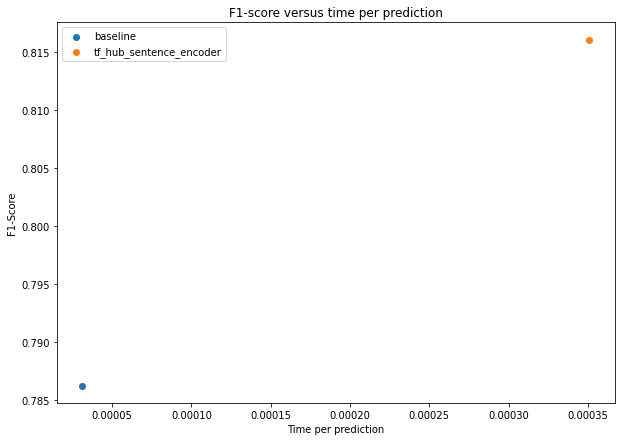

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_5_time_per_pred, model_5_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");